#Exploring Personal Perception Influence on Speed Dating Matches

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import random
from numpy.random import seed

In [3]:
url = 'https://raw.githubusercontent.com/samoseley/ecs171projectspeeddating/main/Speed%20Dating%20Data.csv'
df = pd.read_csv(url, encoding='latin1')

In [4]:
np.random.seed(30536)

## Data Preprocessing

###Copying Important Features
The features below look at people's expectations for the night and ratings of their own attractiveness, sincerity, intelligence, fun, ambition and shared interests. We also included some demographic information, such as sex, age, and race.

In [5]:
df = df[['gender', 'match', 'age', 'race', 'exphappy',
       'expnum', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es']].copy()
display(df)

,gender,match,age,race,exphappy,expnum,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
0,0,0,21.0,4.0,3.0,2.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0
1,0,0,21.0,4.0,3.0,2.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0
2,0,1,21.0,4.0,3.0,2.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0
3,0,1,21.0,4.0,3.0,2.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,0,1,21.0,4.0,3.0,2.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,0,25.0,2.0,10.0,NaN,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,3.0
8374,1,0,25.0,2.0,10.0,NaN,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,3.0
8375,1,0,25.0,2.0,10.0,NaN,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,3.0
8376,1,0,25.0,2.0,10.0,NaN,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0,3.0


###Remove NaN/Empty Values
Since we have enough data we can afford to drop NaN observations and still have a robust dataset.

In [6]:
print(df.isnull().sum())
#drop expnum since it is very empty
df = df.drop(columns=['expnum'])

#remove NaN observations
df = df.dropna()
display(df)

gender         0
match          0
age           95
race          63
exphappy     101
expnum      6578
dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
like         240
prob         309
met          375
match_es    1173
dtype: int64


,gender,match,age,race,exphappy,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
0,0,0,21.0,4.0,3.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0
1,0,0,21.0,4.0,3.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0
3,0,1,21.0,4.0,3.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,0,1,21.0,4.0,3.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
5,0,0,21.0,4.0,3.0,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,1,0,25.0,2.0,10.0,0,2.0,7.0,6.0,6.0,6.0,7.0,5.0,5.0,0.0,3.0
8368,1,0,25.0,2.0,10.0,0,3.0,4.0,6.0,4.0,4.0,4.0,4.0,5.0,0.0,3.0
8369,1,0,25.0,2.0,10.0,0,3.0,3.0,9.0,6.0,9.0,6.0,6.0,3.0,0.0,3.0
8370,1,0,25.0,2.0,10.0,0,2.0,7.0,9.0,8.0,7.0,8.0,6.0,6.0,0.0,3.0


###Encoding Categorical Attributes
Categorical variables must be encoded such that a model can be built using their data. For this purpose One Hot Encoding was used on the Gender and Race columns of the data.


In [7]:
df = pd.get_dummies(df, columns=['gender', 'race'])
print(df)

      match   age  exphappy  dec  attr  sinc  intel  fun  amb  shar  ...  \
0         0  21.0       3.0    1   6.0   9.0    7.0  7.0  6.0   5.0  ...   
1         0  21.0       3.0    1   7.0   8.0    7.0  8.0  5.0   6.0  ...   
3         1  21.0       3.0    1   7.0   6.0    8.0  7.0  6.0   8.0  ...   
4         1  21.0       3.0    1   5.0   6.0    7.0  7.0  6.0   6.0  ...   
5         0  21.0       3.0    0   4.0   9.0    7.0  4.0  6.0   4.0  ...   
...     ...   ...       ...  ...   ...   ...    ...  ...  ...   ...  ...   
8367      0  25.0      10.0    0   2.0   7.0    6.0  6.0  6.0   7.0  ...   
8368      0  25.0      10.0    0   3.0   4.0    6.0  4.0  4.0   4.0  ...   
8369      0  25.0      10.0    0   3.0   3.0    9.0  6.0  9.0   6.0  ...   
8370      0  25.0      10.0    0   2.0   7.0    9.0  8.0  7.0   8.0  ...   
8377      0  25.0      10.0    0   3.0   7.0    6.0  4.0  8.0   1.0  ...   

      prob  met  match_es  gender_0  gender_1  race_1.0  race_2.0  race_3.0  \
0      6

###Normalize Data
Normalizing data allows comparisons between features to be made more easily.

In [8]:
scaler = MinMaxScaler()
df_colnames = ['match', 'age', 'exphappy',
        'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es', 'gender_0', 'gender_1', 'race_1.0', 'race_2.0','race_3.0','race_4.0','race_6.0']
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df_colnames)
display(df_norm)

,match,age,exphappy,dec,attr,sinc,intel,fun,amb,shar,...,prob,met,match_es,gender_0,gender_1,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0
0,0.0,0.081081,0.222222,1.0,0.6,0.9,0.7,0.7,0.6,0.5,...,0.6,0.285714,0.222222,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.081081,0.222222,1.0,0.7,0.8,0.7,0.8,0.5,0.6,...,0.5,0.142857,0.222222,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.081081,0.222222,1.0,0.7,0.6,0.8,0.7,0.6,0.8,...,0.6,0.285714,0.222222,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.081081,0.222222,1.0,0.5,0.6,0.7,0.7,0.6,0.6,...,0.6,0.285714,0.222222,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.081081,0.222222,0.0,0.4,0.9,0.7,0.4,0.6,0.4,...,0.5,0.285714,0.222222,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,0.0,0.189189,1.000000,0.0,0.2,0.7,0.6,0.6,0.6,0.7,...,0.5,0.000000,0.166667,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5812,0.0,0.189189,1.000000,0.0,0.3,0.4,0.6,0.4,0.4,0.4,...,0.5,0.000000,0.166667,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5813,0.0,0.189189,1.000000,0.0,0.3,0.3,0.9,0.6,0.9,0.6,...,0.3,0.000000,0.166667,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5814,0.0,0.189189,1.000000,0.0,0.2,0.7,0.9,0.8,0.7,0.8,...,0.6,0.000000,0.166667,0.0,1.0,0.0,1.0,0.0,0.0,0.0


###Means & Correlations

In [9]:
df_norm.describe().round(2)


,match,age,exphappy,dec,attr,sinc,intel,fun,amb,shar,...,prob,met,match_es,gender_0,gender_1,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0
count,5816.00,5816.00,5816.00,5816.00,5816.00,5816.00,5816.00,5816.00,5816.00,5816.00,...,5816.00,5816.00,5816.00,5816.0,5816.0,5816.00,5816.00,5816.00,5816.00,5816.00
mean,0.16,0.22,0.50,0.42,0.62,0.72,0.73,0.64,0.67,0.54,...,0.52,0.12,0.18,0.5,0.5,0.05,0.55,0.07,0.26,0.07
std,0.37,0.10,0.20,0.49,0.19,0.18,0.16,0.19,0.18,0.21,...,0.21,0.14,0.14,0.5,0.5,0.22,0.50,0.26,0.44,0.26
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.16,0.44,0.00,0.50,0.60,0.60,0.50,0.60,0.40,...,0.40,0.00,0.11,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.22,0.56,0.00,0.60,0.70,0.70,0.70,0.70,0.50,...,0.50,0.00,0.17,0.0,1.0,0.00,1.00,0.00,0.00,0.00
75%,0.00,0.27,0.67,1.00,0.80,0.80,0.80,0.80,0.80,0.70,...,0.70,0.29,0.22,1.0,1.0,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00


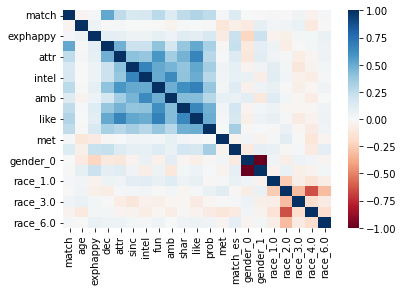

In [10]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=False, cmap='RdBu')

##Regression Analysis: Logistic Regression
Since our target is a yes/no variable (match)

###Split Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(columns=['match']), df_norm['match'], test_size=.25)

###Run Model & Test it


####Create Model & Look at Error
note: testing error is lower than training error, but they are fairly close together. There is no evidence to suggest overfitting has occured

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)


#get Testing and Training error

print("Logistic Regression MSE Trial 1:")
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#mse for training data
mse = mean_squared_error(y_train, yhat_train)
print('Training MSE: %8.15f' % mse)

#mse for testing data
mse = mean_squared_error(y_test, yhat_test)
print('Testing MSE: %8.15f' % mse)


Logistic Regression MSE Trial 1:
Training MSE: 0.146033929390188
Testing MSE: 0.160247592847318


####Classification Report
We have an 83%-85% accuracy which is fairly good, so we can assume that no or minimal underfitting has occured by our model. So our model lies in the "good" fitting range. It should be noted that the amount of matches(1's) is less than amount of no matches (0's) and that precision and recall is worse for 1 compared to 0. This indicates our model is better at deciding non-matches than it is at deciding matches.

In [15]:
print("Testing Precision & Recall")
test_classif = classification_report(y_test, yhat_test)
print(test_classif)

Testing Precision & Recall
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1213
         1.0       0.53      0.27      0.36       241

    accuracy                           0.84      1454
   macro avg       0.70      0.61      0.64      1454
weighted avg       0.81      0.84      0.82      1454



### Data visualization with PCA

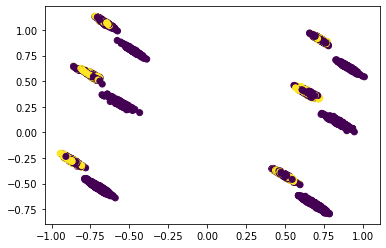

In [19]:
# Create the PCA model
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_norm.drop(columns=['match']))
# visualize the data, coloring by match
plt.scatter(x = pca_df[: ,0], 
            y = pca_df[: ,1],
            c = df_norm['match'])
plt.show()

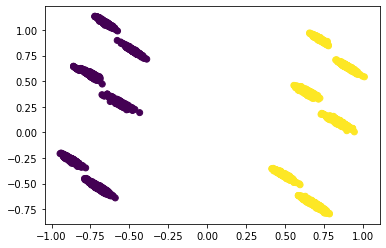

In [22]:
plt.scatter(x = pca_df[: ,0], 
            y = pca_df[: ,1],
            c = df_norm['gender_0'])
plt.show()

Principal componenet weights can give us more information on which attributes are

The above PCA analysis helps us to visualize the data in lower dimensions. There seems to be two sections based on gender which was somewhat expected.It makes sense why our logistic regression model has a hard time classifying matches (yellow). For further exploration we should look to see if the genders are impacted differently in reference to personal perception.

###Coefficient Analysis
An indvidual's decision on the night of the event and, how likely do you think it is that your partner likes you, seems to have to most weight in determing match. Ambition seems to have a negative impact on match. Regression will be re-run without decision, for comparision.

['match', 'age', 'exphappy', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'gender_0', 'gender_1', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0']
[[-0.57667467 -0.65417592  5.581361   -0.60488581  0.45436732  0.97340224
   0.77602445 -0.60980277  0.18896623 -0.07824184  2.00442935  0.61611193
  -0.33020596  0.19563651 -0.19298247 -0.24056244  0.07010087  0.54291513
  -0.41853441  0.04873489]]


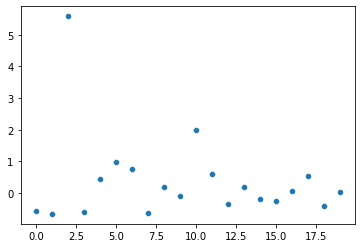

In [23]:
print(df_colnames)
print(model.coef_)
sns.scatterplot(x=list(range(0,len(model.coef_[0]))),y=model.coef_[0])

###Logistic Regression Without 'dec'
Without the overwhelming decider feature 'dec' there is some evidence that lower score on personal perception of attractiveness, fun, and a lower score on liking partner or guessing that partner likes you makes it less likely to get a match.

Logistic Regression MSE Trial 1:
Training MSE: 0.167812929848693
Testing MSE: 0.154057771664374
*********************
Testing Precision & Recall
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      1224
         1.0       0.55      0.15      0.23       230

    accuracy                           0.85      1454
   macro avg       0.70      0.56      0.57      1454
weighted avg       0.81      0.85      0.81      1454



[Text(0, 0, 'age'),
 Text(0, 0, 'exphappy'),
 Text(0, 0, 'attr'),
 Text(0, 0, 'sinc'),
 Text(0, 0, 'intel'),
 Text(0, 0, 'fun'),
 Text(0, 0, 'amb'),
 Text(0, 0, 'shar'),
 Text(0, 0, 'like'),
 Text(0, 0, 'prob'),
 Text(0, 0, 'met'),
 Text(0, 0, 'match_es'),
 Text(0, 0, 'gender_0'),
 Text(0, 0, 'gender_1'),
 Text(0, 0, 'race_1.0'),
 Text(0, 0, 'race_2.0'),
 Text(0, 0, 'race_3.0'),
 Text(0, 0, 'race_4.0'),
 Text(0, 0, 'race_6.0')]

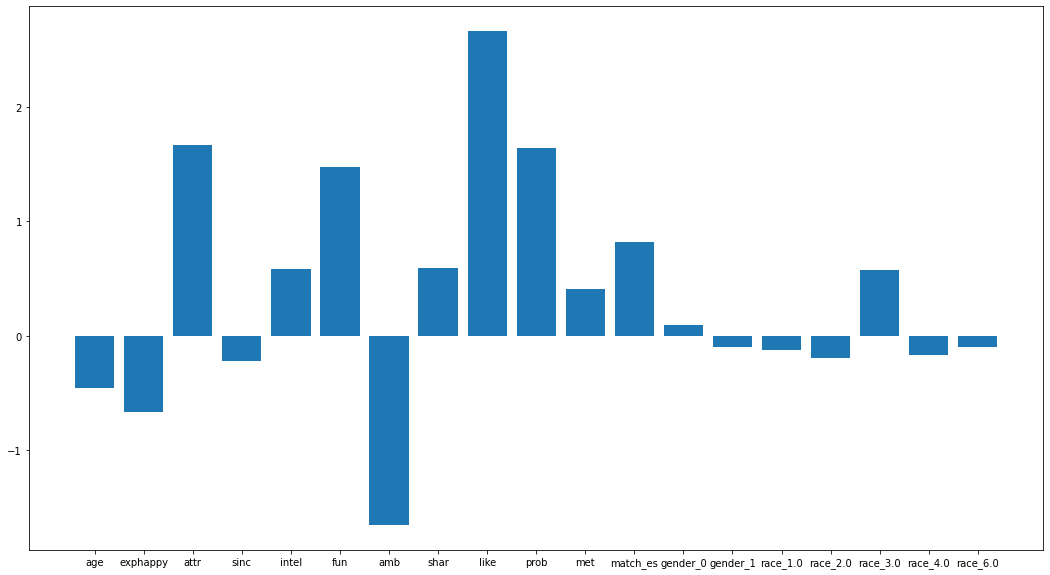

In [25]:
import matplotlib.pylab as pl

#remove 'dec' from dataset
df_ndec = df_norm.drop(columns=['dec'])
df_ndec_colnames = ['age', 'exphappy',
         'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es', 'gender_0', 'gender_1', 'race_1.0', 'race_2.0','race_3.0','race_4.0','race_6.0']

#split the data
X_train, X_test, y_train, y_test = train_test_split(df_ndec.drop(columns=['match']), df_ndec['match'], test_size=.25)

#rerun the model
model = LogisticRegression()
model.fit(X_train, y_train)
test_classif = classification_report(y_test, model.predict(X_test))
#get Testing and Training error
print("Logistic Regression MSE Trial 1:")
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)
#mse for training data
mse = mean_squared_error(y_train, yhat_train)
print('Training MSE: %8.15f' % mse)
#mse for testing data
mse = mean_squared_error(y_test, yhat_test)
print('Testing MSE: %8.15f' % mse)
print('*********************')
print("Testing Precision & Recall")
print(test_classif)

#look at coefficients
pl.rcParams["figure.figsize"] = (40,10)
ax=pl.subplot(122)
pl.bar(np.arange(model.coef_[0].size), model.coef_[0])
ax.set_xticks(np.arange(model.coef_[0].size))
ax.set_xticklabels(df_ndec_colnames)

##Artificial Neural Net Classification

In [ ]:
# Still playing around with which layers increase accuracy

# Initialize model & add layers
ann = Sequential()
ann.add(Dense(units = 10, activation = 'relu', input_dim = 20))
ann.add(Dense(units = 1, activation = 'sigmoid', input_dim = 20))

ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
ann.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 11)

#Threshold yhat
yhat_test = ann.predict(X_test.astype(float))
yhat_testbin = [ 1 if y>=0.5 else 0 for y in yhat_test ]

Epoch 1/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.3797
Epoch 2/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.2930
Epoch 3/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.2888
Epoch 4/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.2856
Epoch 5/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.2860
Epoch 6/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.2828
Epoch 7/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.2845
Epoch 8/11
4362/4362 [==============================] - 5s 1ms/step - loss: 0.2852
Epoch 9/11
4362/4362 [==============================] - 7s 2ms/step - loss: 0.2848
Epoch 10/11
4362/4362 [==============================] - 6s 1ms/step - loss: 0.2828
Epoch 11/11
46/46 [==============================] - 0s 930us/step


### ANN Classification Report
The atrtificial neural net does a much better job predicting the occurance of matches compared to the logistic regression model. So using this model to predict matches is a better idea compared to just a simple logistic regression model.

In [ ]:
print(classification_report(y_test, yhat_testbin))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1213
         1.0       0.48      0.50      0.49       241

    accuracy                           0.83      1454
   macro avg       0.69      0.70      0.69      1454
weighted avg       0.83      0.83      0.83      1454



##Conclusion
A person's decision regarding a match was the strongest indicator of match which is not surprising. However, how much you rate how fun you are and how much you guess the partner likes you also contributed significantly to the match value. When not considering 'dec' the importance of the other features can be more readily analyzed. Personal perception of fun and how much you think the partner likes you still contribute significantly to match value. Additionally, how much you like the partner and how you percieve your own attractiveness becomes more important. Interestingly for both logistic regression model runs your personal perception of ambition is paried with a negative coefficient which seems to indicate a higher personal perception score reduces the probability of making a match. It should be noted that there is more data for not a match and the not a match occurance (a 0) has a greater precision and recall. This indicates that it is more likely that a low personal preception of attractiveness and fun results in a no-match then a high personal preception of attractiveness and fun results in a yes-match. Futhermore, if we want to use personal perception to predict a match it would be beneficial to use an artifical neural net compared to a simple logistic regression because our ANN had better percision and recall in predicting matches compared to our logistic regression. For further exploration we should look if the importance of personal perception differs among the genders.